<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



### Angélica Vanegas García- 1000290572

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
#@title Primer punto

#constantes
T_inf = 300
A = 5e-5
p = 0.102
k = 200
Tb = 313
h = 20
#condiciones iniciales para theta y para T
theta_0 = Tb - T_inf
T_0 = 1e-5
condiciones_iniciales = np.array([theta_0, T_0])
x = np.linspace(0, 1, 1000)

In [ ]:
#funcion para la ecuación diferencial
def funcion(condiciones_iniciales, x):
  a = (h*p)/(k*A)
  theta_0, T_0 = condiciones_iniciales
  dthetadx = T_0
  dTdx = (a**2)*theta_0
  return  dthetadx, dTdx

In [ ]:
#funcion teorica
T = lambda x: T_inf + (Tb - T_inf)*np.exp((-x)*np.sqrt((h*p)/(k*A)))

In [223]:
#funcion para hallar la raiz
T_r = lambda x: (T_inf + (Tb - T_inf)*np.exp((-x)*np.sqrt((h*p)/(k*A)))) - 305

In [ ]:
solucion = odeint(funcion, condiciones_iniciales, x)

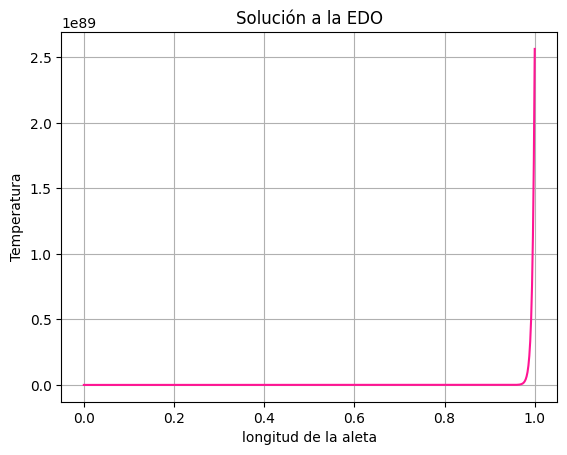

In [ ]:
#@title Segundo Punto
plt.plot(x, solucion[:, 0], color = "deeppink")
plt.title("Solución a la EDO")
plt.ylabel("Temperatura")
plt.xlabel("longitud de la aleta")
plt.grid()
plt.show()

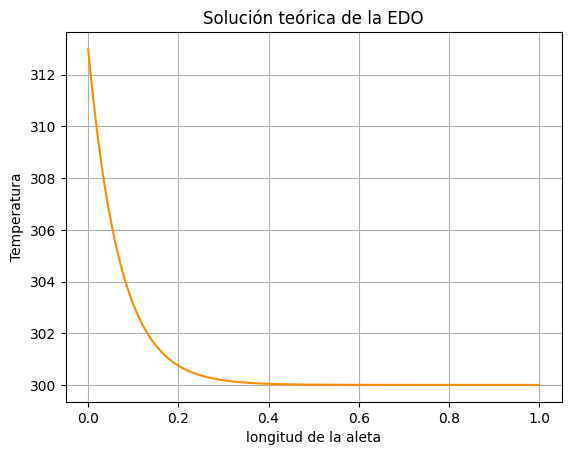

In [226]:
#@title Tercer punto (Gráfico de la solución teórica)
plt.plot(x, T(x), color = "darkorange")
plt.title("Solución teórica de la EDO")
plt.ylabel("Temperatura")
plt.xlabel("longitud de la aleta")
plt.grid()
plt.show()

In [225]:
#@title Cuarto Punto
raiz = optimize. newton(T_r, 0.2)
raiz

0.06689918232663714

In [230]:
T_r_raiz = T_r(raiz)

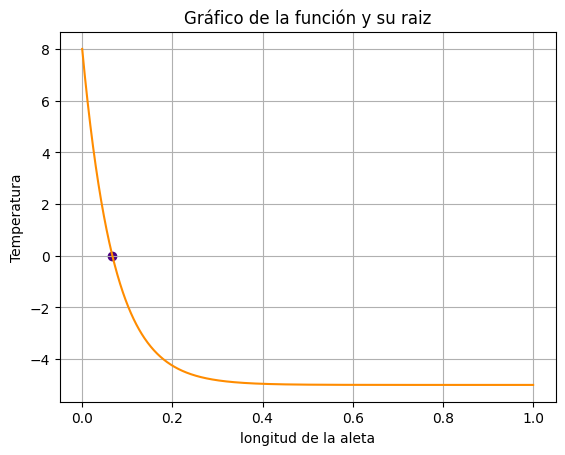

In [232]:
plt.scatter(raiz, T_r_raiz, color = "indigo")
plt.plot(x, T_r(x), color = "darkorange")
plt.title("Gráfico de la función y su raiz")
plt.ylabel("Temperatura")
plt.xlabel("longitud de la aleta")
plt.grid()
plt.show()